In [ ]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import seaborn as sns
import os
import pandas as pd
from copy import deepcopy
from matplotlib import pyplot as plt
from os.path import join
import numpy as np
import imodelsx.process_results
import qa_questions
import random
import feature_spaces
import encoding_utils
import joblib
from tqdm import tqdm
import feature_spaces
import dvu
dvu.set_style()
fit_encoding = __import__('01_fit_encoding')

In [104]:
class A:
    use_test_setup = False
    subject = 'UTS03'
    # feature_space = 'eng1000'
    # feature_space = 'qa_embedder-10'
    feature_space = 'qa_embedder-5'
    qa_questions_version = 'v1'

    # feature_space = 'qa_embedder-25'
    # qa_questions_version = 'v1-ending'
    qa_embedding_model = 'mistralai/Mistral-7B-v0.1'
    trim = 5
    num_stories = -1


args = A()
story_names_train, story_names_test = fit_encoding.get_story_names(args)
story_name = story_names_test[:1]

In [112]:
features_downsampled_list = []
# Features
allstories, vectors, wordseqs = feature_spaces.get_features(
    args.feature_space,
    allstories=story_name,
    qa_embedding_model=args.qa_embedding_model,
    qa_questions_version=args.qa_questions_version,
    downsample=False,
)

s = story_name[0]
features_downsampled = feature_spaces.downsample_word_vectors(
    allstories,
    vectors,
    wordseqs,
    strategy='exp',
)[s]
vectors = vectors[s]
wordseqs = wordseqs[s]

# # nromalize each row of features_downsampled
features_downsampled = features_downsampled / \
    np.linalg.norm(features_downsampled, axis=1)[:, np.newaxis]

# # normalize each column of vectors
vectors = vectors / np.linalg.norm(vectors, axis=0)[np.newaxis, :]

getting wordseqs..
extracting qa_embedder embs...
Loading cached 0/1: wheretheressmoke


/tmp/ipykernel_593430/3308540827.py:22: RuntimeWarning: invalid value encountered in divide
  features_downsampled = features_downsampled / \


In [113]:
qa_questions.get_questions(args.qa_questions_version)[0]

'Does the input contain a measurement?'

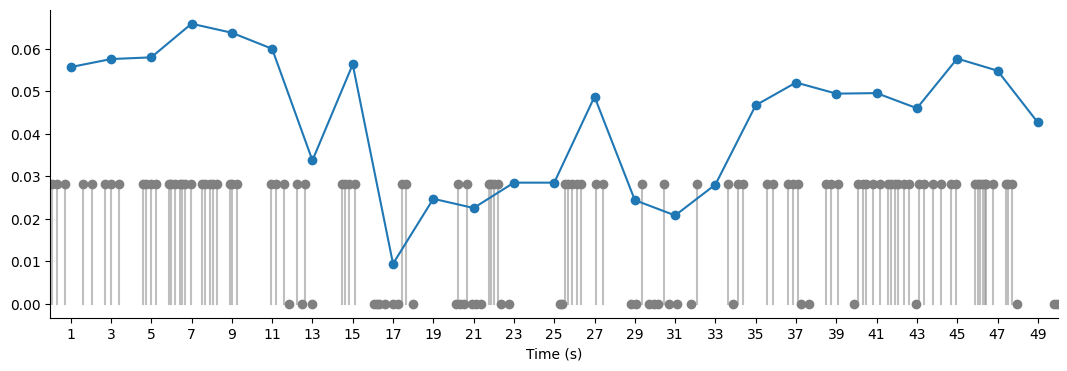

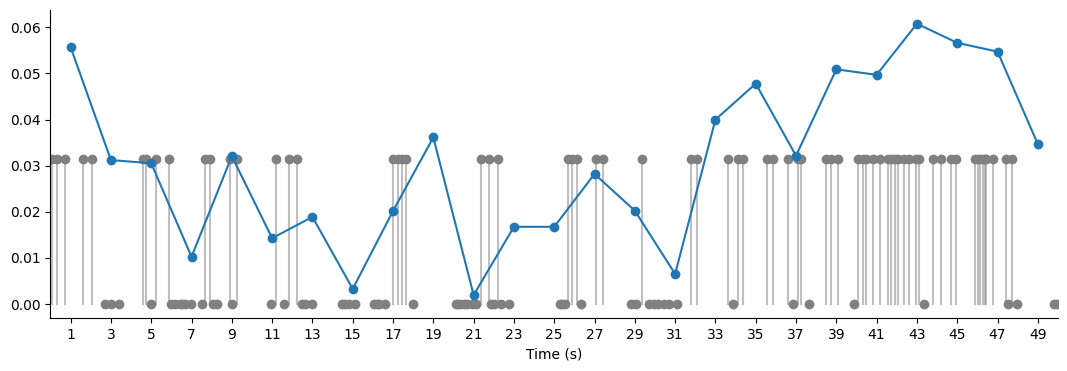

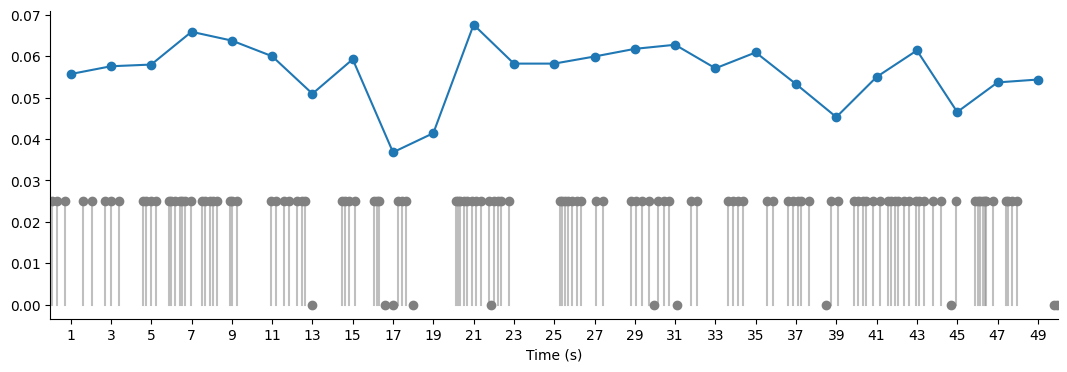

In [114]:
for question_num in range(3):
    question_anwer_vals = vectors[:, question_num]
    question_answers_downsampled = features_downsampled[:, question_num]

    plt.figure(figsize=(13, 4))

    # draw vertical line from 0 to each val
    trs = wordseqs.tr_times

    # xlim = (0, int(max(wordseqs.data_times) - 1))
    xlim = (0, 50)
    for i in range(len(question_anwer_vals)):
        t = wordseqs.data_times[i]
        if t >= xlim[0] and t <= xlim[1]:
            plt.plot([t, t],
                     [0, question_anwer_vals[i]], '-', alpha=0.5, color='gray')
            plt.plot(t, question_anwer_vals[i], 'o', color='gray')
    idxs = (trs >= xlim[0]) & (trs <= xlim[1])
    plt.plot(trs[idxs],
             question_answers_downsampled[idxs], '-o', color='C0')

    plt.xticks(trs)
    plt.xlim(xlim)

    plt.xlabel('Time (s)')
    plt.show()

In [128]:
print(' '.join([' '.join(wordseqs.chunks()[idx])
      for idx in np.arange(len(idxs))[idxs]]))

i reached over and secretly undid my seatbelt and when his foot hit the brake at the red light i flung open the door and i ran i had no shoes on i was crying i had no wallet but i was ok because i had my cigarettes  and i didn't want any part of freedom if i didn't have my cigarettes when you live with someone who has a temper a very bad temper a very very bad temper you learn to play around that you learn this time i'll play possum and next time i'll just be real nice or i'll say yes to everything or you make yourself scarce or you run and this was one of the times when you just run and as
